In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [3]:
# Load labeledTrainData.tsv
labeled_train = pd.read_csv(r"C:\Users\youse\Desktop\INDIA PROJECT TECHNO\Movie\labeledTrainData.tsv\labeledTrainData.tsv", delimiter='\t', encoding='utf-8')

# Load testData.tsv
test_data = pd.read_csv(r"C:\Users\youse\Desktop\INDIA PROJECT TECHNO\Movie\testData.tsv\testData.tsv", delimiter='\t', encoding='utf-8')

# Data Preprocessing
X = labeled_train['review']
y = labeled_train['sentiment']

In [4]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

X_tfidf = tfidf_vectorizer.fit_transform(X)

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [5]:
# Model Building
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_val)


accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print(classification_report(y_val, y_pred))

Accuracy: 0.84
              precision    recall  f1-score   support

           0       0.83      0.86      0.84      2481
           1       0.85      0.83      0.84      2519

    accuracy                           0.84      5000
   macro avg       0.84      0.84      0.84      5000
weighted avg       0.84      0.84      0.84      5000



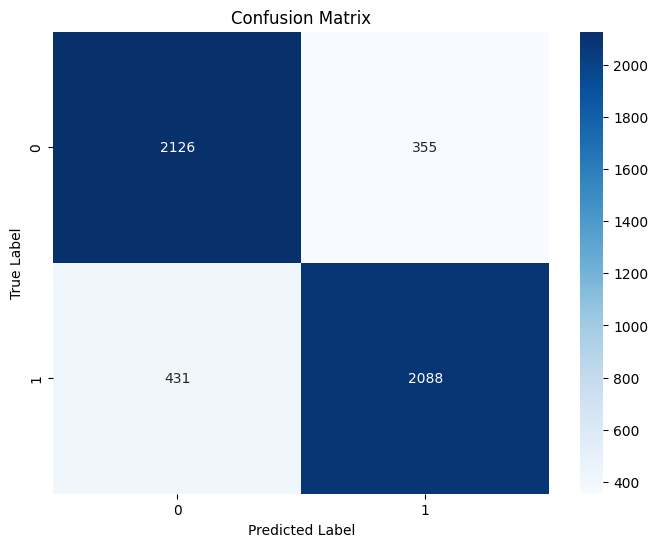

In [6]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

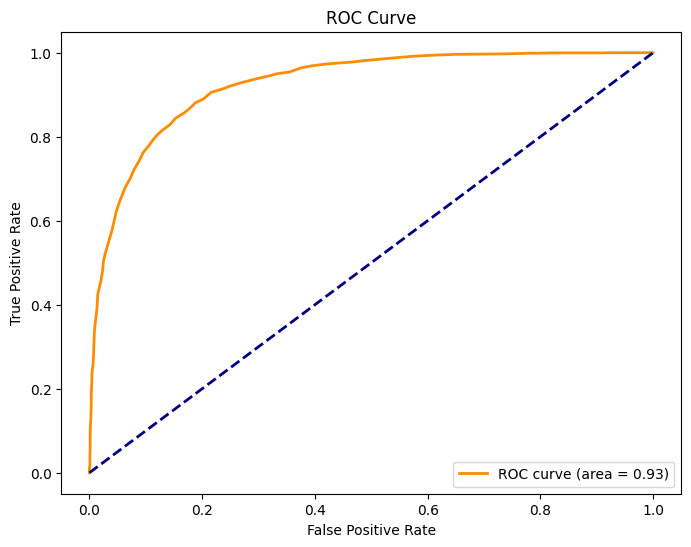

In [7]:
# ROC Curve and AUC
y_pred_proba = clf.predict_proba(X_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()